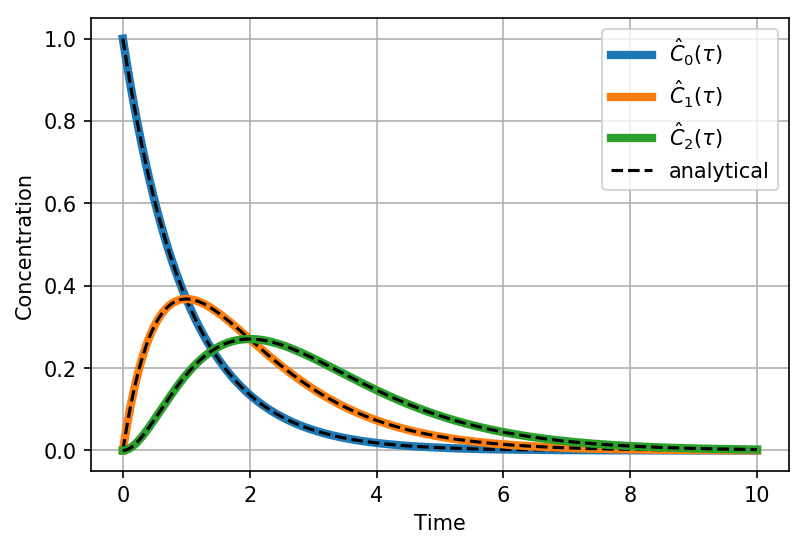

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rk4 as myode

def fm(c,t,c_in,tau):
    rhs=[]
    rhs.append(c_in-c[0])
    rhs.append(c[0]-c[1])
    rhs.append(c[1]-c[2])
    return np.array(rhs)/tau


h = 1e-2
# initial values
vol=1;q=1;c_into = 0; c_init = [1,0,0]
tau=[1,1,1];t_final=10 # end of simulation 
t,f = myode.ode_solv(fm,0,c_init,t_final,h,c_into,tau)
f_an = []
f_an.append(c_init[0]*np.exp(-t))
f_an.append(c_init[0]*t*np.exp(-t))
f_an.append(c_init[0]*0.5*t*t*np.exp(-t))

symb = ['-p','-v','-*','-s']
fig = plt.figure(dpi=150)
for i in range(0,len(c_init)):
    legi = '$\hat{C}_'+str(i)+'(\\tau)$'
    plt.plot(t, f[:,i], '-', label=legi,lw=4)
    plt.plot(t, f_an[i], '--', color='k')
plt.plot(0,0 , '--', color='k',label='analytical')
plt.legend(loc='upper right', ncol=1)
#plt.ylim([0,50])
plt.grid()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()